### "Rank" comparisons

How do pages 1 occurrence of "literature" differ from pages with 2, 3, 4, etc.?

In [1]:
from hol.level_series import LevelSeries

# Synchronic level topns.
topns = LevelSeries(range(1, 20), depth=1000)

### Jaccard distance from level 1 -> N

The edit distance between the MDWs for each successive level (for all years) and the level 1 list. All years:

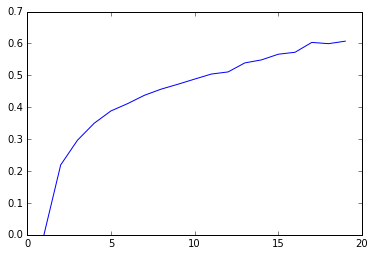

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
    
distances = topns.jaccard_distances_from_1()

plt.plot(*zip(*distances.items()))

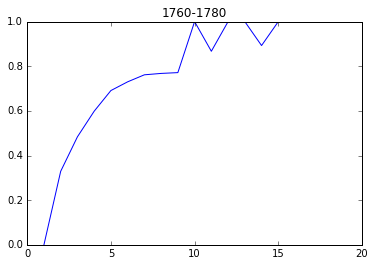

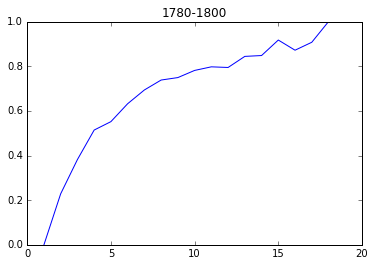

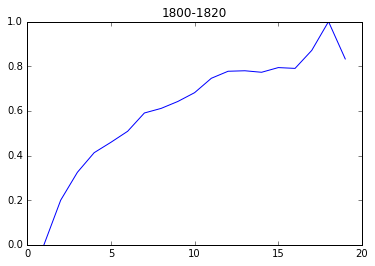

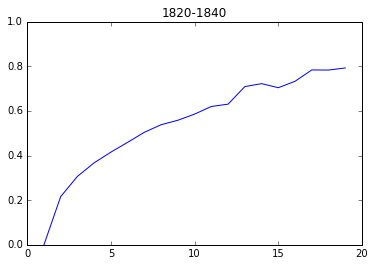

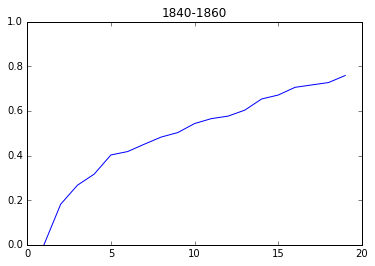

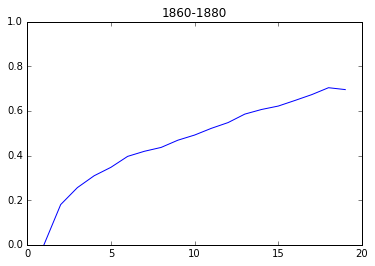

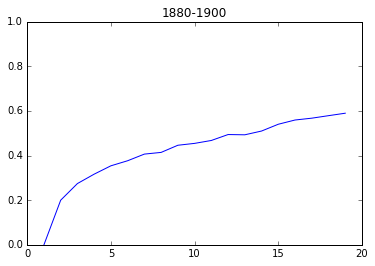

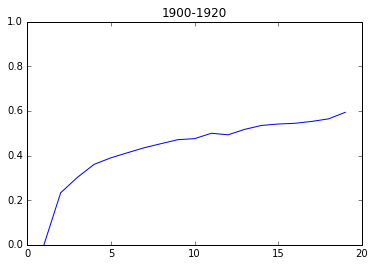

In [3]:
from collections import OrderedDict

buckets = OrderedDict([
    ('1760-1780', LevelSeries(range(1, 20), year1=1760, year2=1780)),
    ('1780-1800', LevelSeries(range(1, 20), year1=1780, year2=1800)),
    ('1800-1820', LevelSeries(range(1, 20), year1=1800, year2=1820)),
    ('1820-1840', LevelSeries(range(1, 20), year1=1820, year2=1840)),
    ('1840-1860', LevelSeries(range(1, 20), year1=1840, year2=1860)),
    ('1860-1880', LevelSeries(range(1, 20), year1=1860, year2=1880)),
    ('1880-1900', LevelSeries(range(1, 20), year1=1880, year2=1900)),
    ('1900-1920', LevelSeries(range(1, 20), year1=1900, year2=1920)),
])

for label, topns in buckets.items():
    
    distances = topns.jaccard_distances_from_1()
    
    plt.title(label)
    plt.ylim(0, 1)
    plt.plot(*zip(*distances.items()))
    plt.show()

### Plot the rank series for word from level 1 -> N

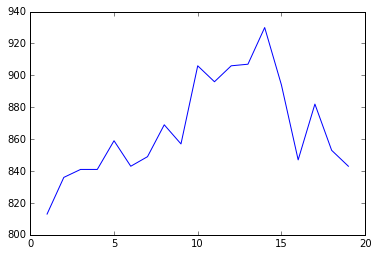

In [4]:
series = topns.rank_series('teacher')

plt.plot(*zip(*series.items()))

### Ranked series

In [ ]:
import math
import numpy as np

def small_multiples(result, n=50, cols=5):

    topn = list(result.items())[:n]
    
    # Get X-axis range.
    lev1 = list(topns.levels)[0]
    lev2 = list(topns.levels)[-1]
    
    # Calculate the row count and figure size.
    rows = math.ceil(n / 5)
    figsize = (cols*2, rows*2)
    
    # Make the figure + axes.
    fig, axarr = plt.subplots(rows, cols, figsize=figsize, sharey='row')
    fig.tight_layout(pad=0, h_pad=2, w_pad=0.1)
    
    for i, (token, score) in enumerate(topn):
        
        ax = axarr[math.floor(i/cols)][i%cols]
        
        # Query the smoothed rank series.
        series = topns.rank_series(token)
            
        ax.set_title(token)
        ax.tick_params(labelsize=8)
        ax.set_xlim(lev1, lev2)
        ax.set_ylim(0, topns.depth)

        ax.plot(*zip(*series.items()), linestyle='none', marker=".")
        
def print_series_query(_lambda, *args, **kwargs):
    result = topns.sort_rank_series(_lambda)
    small_multiples(result, *args, **kwargs)

### High variance

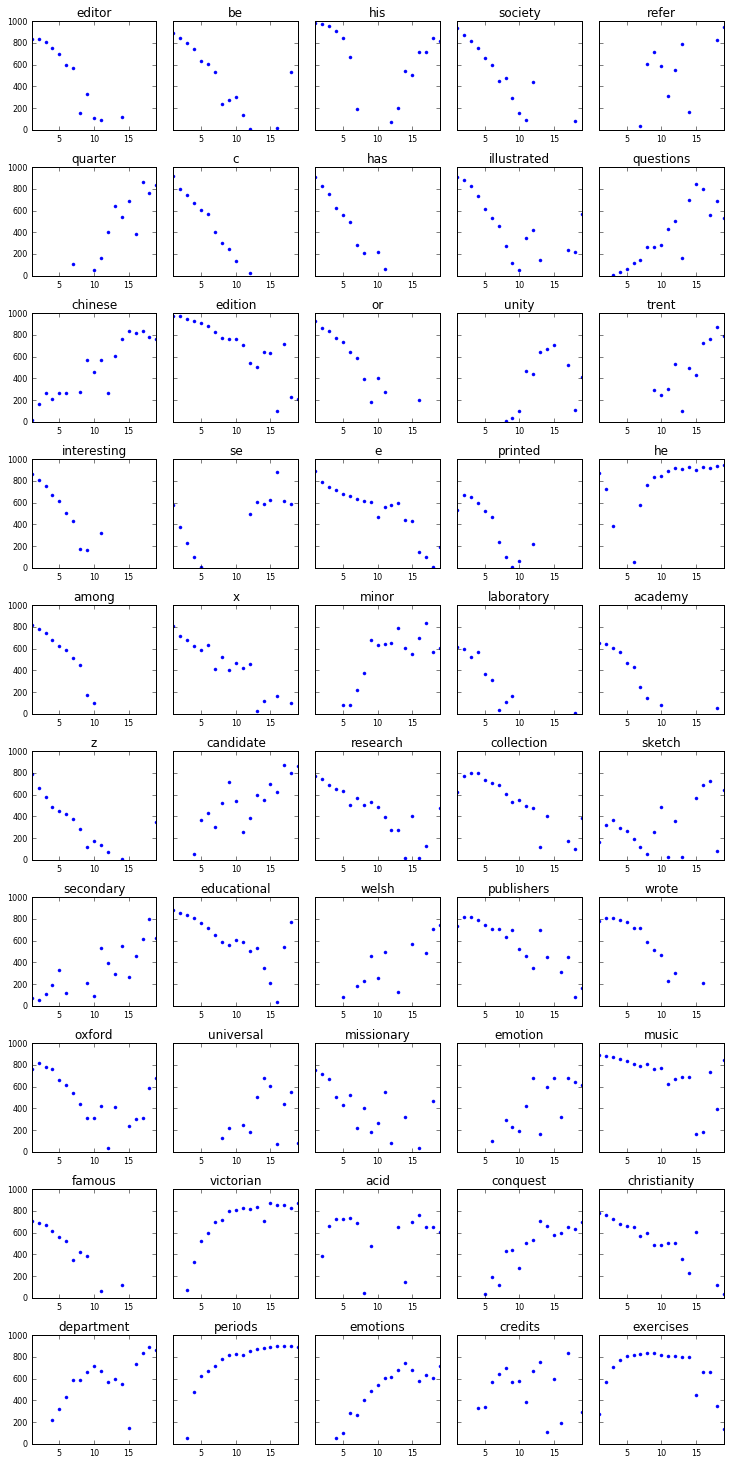

In [8]:
def score(s):
    return np.var(list(s.values()))

print_series_query(score, n=50)

### Increasing

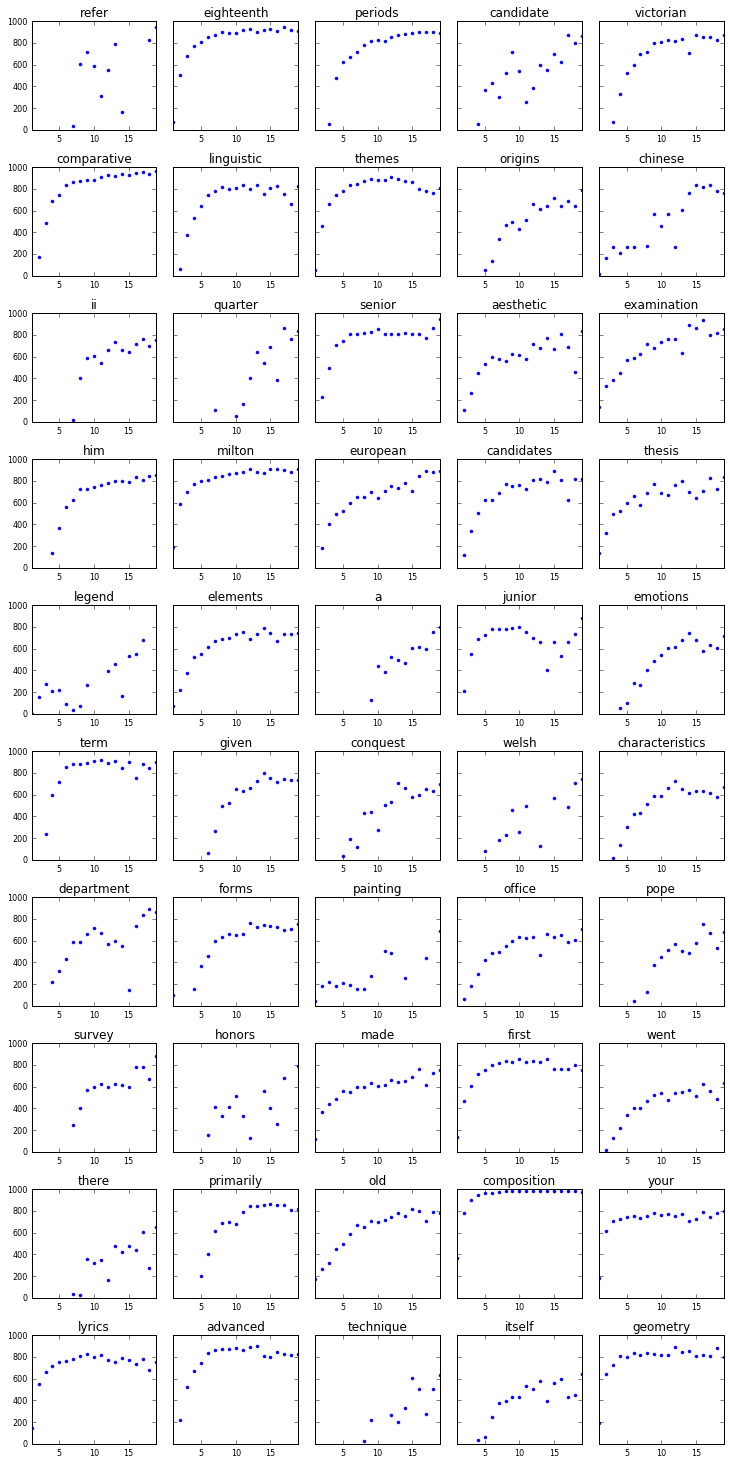

In [5]:
def score(s):
    y = list(s.values())
    return y[-1] - y[0]

print_series_query(score, n=50)

### Decreasing

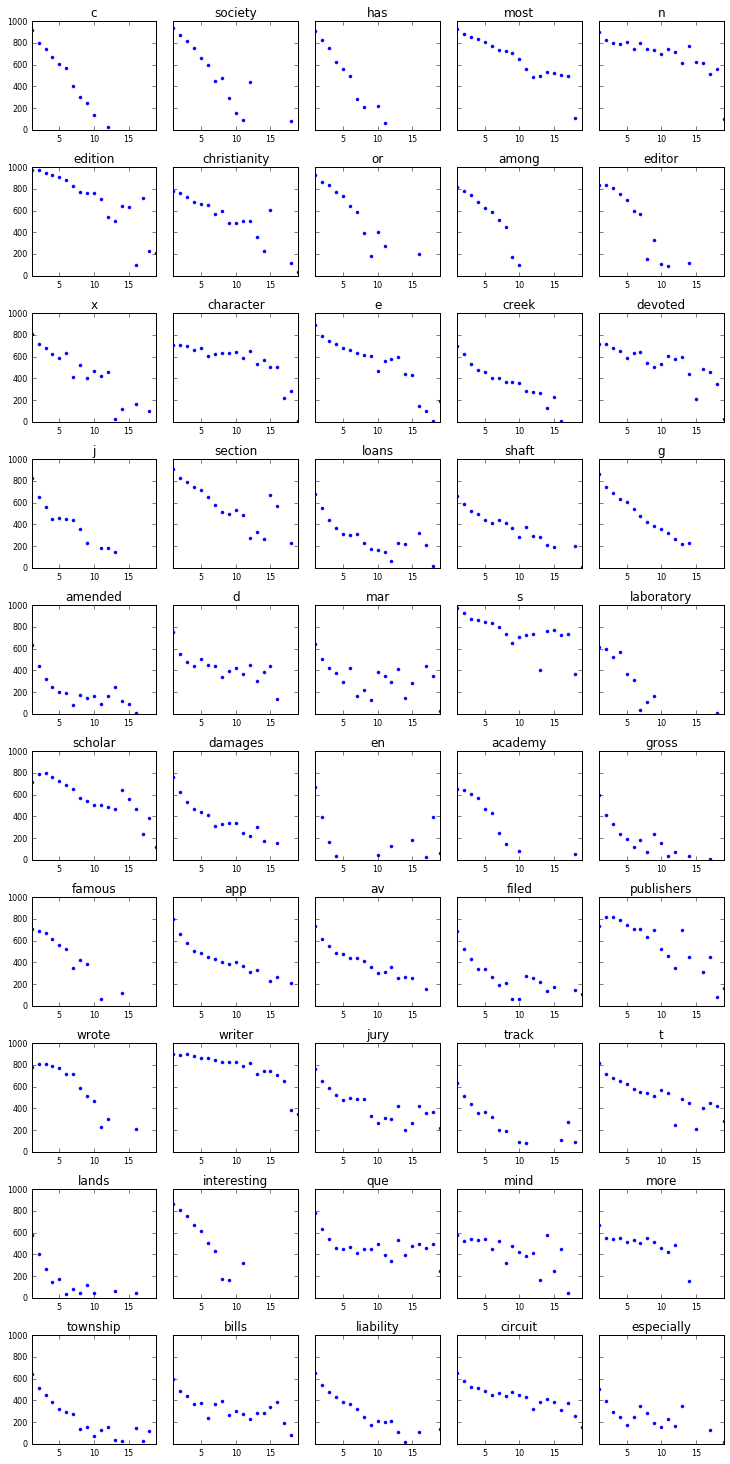

In [6]:
def score(s):
    y = list(s.values())
    return y[0] - y[-1]

print_series_query(score, n=50)

### Constant

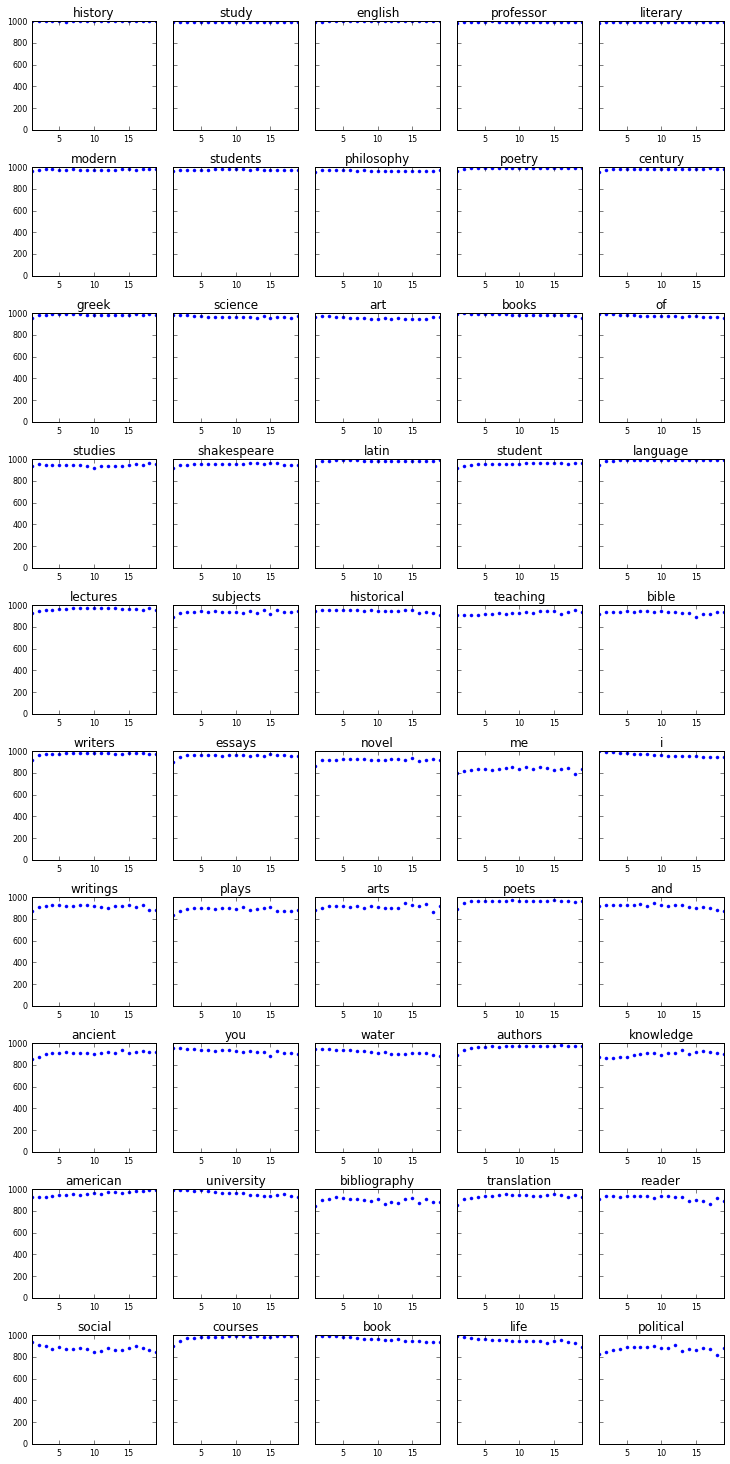

In [7]:
def score(s):
    return -np.var(list(s.values()))

print_series_query(score, n=50)

### "Content" words by 20-year buckets

In [15]:
from tabulate import tabulate

def print_bucketed_queries(buckets, _lambda):

    cols = []
    for y1, y2 in buckets:
        topns = LevelSeries(range(1, 20), year1=y1, year2=y2)
        result = topns.sort_rank_series(_lambda)
        cols.append(list(result.keys()))

    table = []
    for i in range(50):
        table.append([c[i] for c in cols])
    
    headers = [
        '{0}-{1}'.format(y1, y2)
        for y1, y2 in buckets
    ]

    print(tabulate(table, headers=headers))

buckets = [
    (1760, 1800),
    (1800, 1840),
    (1840, 1880),
    (1880, 1920),
]

def increasing(s):
    y = list(s.values())
    return y[-1] - y[0]

print_bucketed_queries(buckets, increasing)

1760-1800     1800-1840        1840-1880        1880-1920
------------  ---------------  ---------------  ---------------
discussion    standard         nebraska         period
second        perfection       biology          eighteenth
special       importance       special          semester
cultivation   associates       course           arnold
instructor    ability          middle           aesthetic
decline       itself           creative         department
by            russian          advanced         were
arrangement   forms            thesis           comparative
spanish       revival          nineteenth       characteristics
principal     instructor       nation           collections
emphasis      encouragement    see              examination
social        good             victorian        hours
geometry      expression       eighteenth       themes
equivalent    honorary         second           senior
research      characteristics  european         elements
completed     rea

### "Context" words by 20-year buckets

In [16]:
def decreasing(s):
    y = list(s.values())
    return y[0] - y[-1]

print_bucketed_queries(buckets, decreasing)

1760-1800     1800-1840      1840-1880      1880-1920
------------  -------------  -------------  ------------
published     writer         new            society
library       biography      knowledge      or
publication   motion         interesting    r
book          life           instruction    j
productions   pages          illustrations  c
lord          acid           among          who
said          university     learned        christianity
geography     new            story          interesting
school        knowledge      g              x
land          bank           volume         most
do            celebrated     be             published
go            essays         progress       editor
celebrated    academy        series         publications
we            would          money          g
ground        merit          cent           wrote
let           collection     payment        app
enemy         m              publications   f
whose         lands          edition        